In [83]:
#Import necessary libraries
import pandas as pd
import numpy as np

#Load the csv file
df=pd.read_csv("loan_data.csv")

In [84]:
#Structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
#Check for column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [86]:
#Print the first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
#Print the last 3 rows
df.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [88]:
#Check for categorical values
df.select_dtypes(include=["object"])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [89]:
#Check for numerical values
df.select_dtypes(exclude=["object"])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [90]:
#Check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
#Fill the missing values using forward fill
df["Gender"]=df["Gender"].ffill()
df["Married"]=df["Married"].ffill()
df["Dependents"]=df["Dependents"].ffill()
df["Self_Employed"]=df["Self_Employed"].ffill()

In [92]:
#Fill the missing values using backward fill
df["LoanAmount"]=df["LoanAmount"].bfill()
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].bfill()
df["Credit_History"]=df["Credit_History"].bfill()

In [93]:
#Check no.of rows and columns
df.shape

(614, 13)

In [94]:
#Check for unique values
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [95]:
#Summary statistics for numerical values
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


In [96]:
#Summary statistics for categorical values
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,500,400,354,480,528,233,422


In [97]:
#Access the 10th row
df.iloc[9]

Loan_ID               LP001020
Gender                    Male
Married                    Yes
Dependents                   1
Education             Graduate
Self_Employed               No
ApplicantIncome          12841
CoapplicantIncome      10968.0
LoanAmount               349.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Loan_Status                  N
Name: 9, dtype: object

In [98]:
#Retrieve only the Education & ApplicantIncome
df[["Education","ApplicantIncome"]]

,Education,ApplicantIncome
0,Graduate,5849
1,Graduate,4583
2,Graduate,3000
3,Not Graduate,2583
4,Graduate,6000
...,...,...
609,Graduate,2900
610,Graduate,4106
611,Graduate,8072
612,Graduate,7583


In [99]:
#Print the Property Area of 5th row
df.loc[4,"Property_Area"]

'Urban'

In [100]:
#Retrieve rows from 50 to 100 with only(gender & married)
df.loc[50:100,["Gender","Self_Employed"]]

,Gender,Self_Employed
50,Female,No
51,Female,No
52,Female,No
53,Male,No
54,Female,Yes
55,Male,No
56,Male,No
57,Male,No
58,Male,No
59,Male,No


In [101]:
#Rename the credit history column
df.rename(columns={"Credit_History":"Credit_Score"},inplace=True)

In [102]:
#Drop a column
df.drop("Loan_Amount_Term",axis=1,inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_Score,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,Y


In [103]:
#Print total income greater than 10000
df[df["LoanAmount"]>500]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_Score,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,0.0,Semiurban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,1.0,Urban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,1.0,Rural,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,1.0,Semiurban,Y


In [104]:
#Groupby
df.groupby("Self_Employed")["LoanAmount"].mean()

Self_Employed
No     142.623106
Yes    169.709302
Name: LoanAmount, dtype: float64

In [105]:
#Sort the total income column
df.sort_values(by="ApplicantIncome")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_Score,Property_Area,Loan_Status
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,1.0,Rural,N
468,LP002502,Female,Yes,2,Not Graduate,No,210,2917.0,98.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,1.0,Urban,N
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,1.0,Rural,Y
188,LP001644,Male,Yes,0,Graduate,Yes,674,5296.0,168.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,1.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,0.0,Semiurban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,1.0,Urban,Y


In [106]:
#Convert the categorical values into numerical values
df["Property_Area"]=df["Property_Area"].map({
    "Urban":0,
    "Rural":1,
    "Semiurban":2
})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_Score,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,1,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,1,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,1.0,1,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,1.0,0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,0,Y


In [107]:
#Replace values
df['Dependents'] = df['Dependents'].replace('3+', 3)

In [108]:
#Save the updated csv file
df.to_csv("loan_dataset.csv")

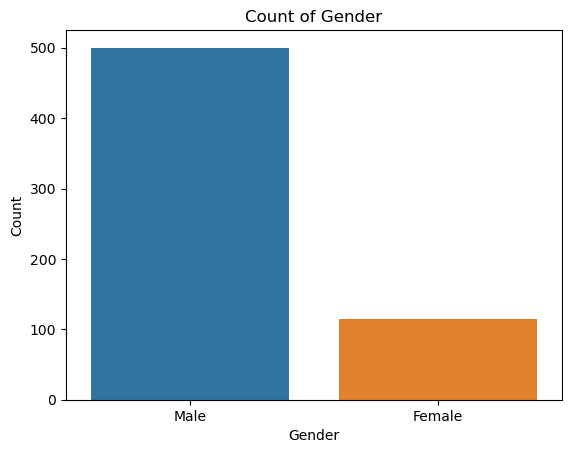

In [109]:
#Visualize the count of Gender
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x="Gender")
plt.title("Count of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [110]:
#Encode the Categorical values 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in ['Loan_ID','Gender', 'Married', 'Education', 'Loan_Status','Self_Employed','Loan_Status']:
    df[i] = le.fit_transform(df[i].astype(str))
    print(df)


     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0          0    Male      No          0      Graduate            No   
1          1    Male     Yes          1      Graduate            No   
2          2    Male     Yes          0      Graduate           Yes   
3          3    Male     Yes          0  Not Graduate            No   
4          4    Male      No          0      Graduate            No   
..       ...     ...     ...        ...           ...           ...   
609      609  Female      No          0      Graduate            No   
610      610    Male     Yes          3      Graduate            No   
611      611    Male     Yes          1      Graduate            No   
612      612    Male     Yes          2      Graduate            No   
613      613  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_Score  \
0               5849                0.0       128.0           1.0   
1        

In [111]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

[[0 1 0 ... 128.0 1.0 0]
 [1 1 1 ... 128.0 1.0 1]
 [2 1 1 ... 66.0 1.0 0]
 ...
 [611 1 1 ... 253.0 1.0 0]
 [612 1 1 ... 187.0 1.0 0]
 [613 0 0 ... 133.0 0.0 2]]
[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1

In [112]:
# Splitting the dataset into the train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[90 1 1 ... 131.0 1.0 2]
 [533 1 0 ... 196.0 1.0 2]
 [452 1 1 ... 149.0 0.0 1]
 ...
 [359 1 1 ... 200.0 1.0 2]
 [192 1 1 ... 160.0 1.0 0]
 [559 0 1 ... 182.0 1.0 2]]
[1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 0 1 1

In [113]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.23074579  0.48018376  0.71468121 ... -0.18530234  0.4411884
   1.13620956]
 [ 1.27543964  0.48018376 -1.39922526 ...  0.55644157  0.4411884
   1.13620956]
 [ 0.81719806  0.48018376  0.71468121 ...  0.02010367 -2.26660539
  -0.05329768]
 ...
 [ 0.29106884  0.48018376  0.71468121 ...  0.60208735  0.4411884
   1.13620956]
 [-0.65370084  0.48018376  0.71468121 ...  0.14562956  0.4411884
  -1.24280491]
 [ 1.42252953 -2.08253608  0.71468121 ...  0.39668134  0.4411884
   1.13620956]]
[[ 0.82851266  0.48018376 -1.39922526 ... -0.72164025  0.4411884
   1.13620956]
 [-1.44572332 -2.08253608 -1.39922526 ... -0.40211979  0.4411884
   1.13620956]
 [ 1.29241155  0.48018376  0.71468121 ...  2.0171065   0.4411884
  -1.24280491]
 ...
 [-0.16717274  0.48018376  0.71468121 ...  3.29518832  0.4411884
   1.13620956]
 [ 0.89640031  0.48018376  0.71468121 ... -0.88140047 -2.26660539
  -1.24280491]
 [-0.02574015  0.48018376  0.71468121 ... -0.58470291  0.4411884
  -1.24280491]]


In [114]:
#Train the dataset
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
#Predict the model
from sklearn.metrics import accuracy_score,classification_report 
y_pred =knn.predict (X_test)
#Check Accuracy score
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.85


In [116]:
#Classification Report 
Classification =classification_report(y_test,y_pred)
print("Classification Report:\n",Classification)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.55      0.65        33
           1       0.85      0.96      0.90        90

    accuracy                           0.85       123
   macro avg       0.83      0.75      0.78       123
weighted avg       0.84      0.85      0.83       123



In [117]:
#Test the model on new data
new_data =pd.DataFrame( {
    'Loan_ID': [615,616],
    'Gender': [0,1],
    'Married': [1,0],
    'Dependents': [2,3],
    'Education': [1,0],
    'Self_Employed': [1,1],
    'ApplicantIncome': [3000,2000],
    'CoapplicantIncome': [4000,4500],
    'LoanAmount': [500,800],
    'Credit_Score': [1,0],
    'Property_Area': [1,2]
})
new_data_scaled=sc.transform(new_data)
predict_new=knn.predict(new_data_scaled)
print("Loan Status:",predict_new)

Loan Status: [1 1]


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [119]:
import joblib
joblib.dump(knn,"knn_model.pkl")

['knn_model.pkl']